In [1]:
from utils import *

In [2]:
from preprocess import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
df_ans, question_types, radixes, sample_ans, idx_truth = preprocess_1k()

In [5]:
df_ans

,id,saving,tuition,home,spouse,job,college,comm,us,age,e_home,e_income,e_gas,e_harvard,e_state,e_internet,e_tuition,e_election
0,ARPBDM5QZ4XQC,Harder,Easier,Harder,Easier,Easier,Easier,Easier,Yes,44.0,150000.0,35000.0,3.99,15.0,50.0,250.0,15000.0,2024.0
1,A1YSYI926BBOHW,Harder,Harder,Harder,Easier,Same,Same,Harder,Yes,38.0,315000.0,49000.0,5.29,3.0,50.0,300.0,14000.0,2024.0
2,ASVPTWBAE7UJ,Easier,Easier,Easier,Easier,Same,Easier,Easier,Yes,25.0,4000.0,50000.0,4500.00,4000.0,3000.0,5000.0,4000.0,4500.0
3,A1DMXEJGJY02E1,Harder,Harder,Harder,Same,Harder,Same,Easier,Yes,34.0,250000.0,40000.0,3.65,20.0,50.0,5.0,15000.0,2024.0
4,A2HXOWSUZCQLB6,Same,Harder,Same,Easier,Same,Harder,Easier,Yes,40.0,14.0,6.0,3.00,6.0,2.0,6.0,2021.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A2Z3BFRLKZIM67,Same,Easier,Same,Same,Same,Same,Easier,Yes,25.0,500.0,50000.0,200.00,80.0,50.0,500.0,500.0,2024.0
996,A1651250EKM6LE,Harder,Easier,Harder,Easier,Same,Easier,Same,Yes,30.0,20000.0,3000.0,200.00,2520000.0,50.0,2000.0,60000.0,3000.0
997,A3UHDPXC5EWOKC,Harder,Same,Harder,Harder,Same,Harder,Harder,Yes,25.0,50000.0,75000.0,85.00,87.0,42.0,3.0,250000.0,2025.0
998,A17I9PP3CH0121,Same,Easier,Easier,Easier,Easier,Same,Same,Yes,34.0,60000.0,35000.0,5.00,65.0,50.0,290.0,7500.0,2026.0


## Filtered according to all questions

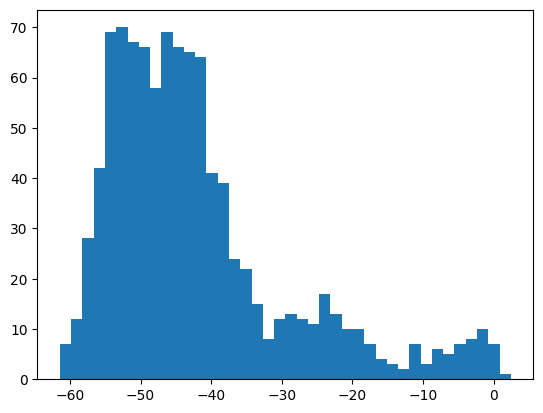

In [6]:
prob_random_all = denoise(sample_ans, radixes, question_types)

plt.hist(prob_random_all, bins=40)
plt.show()

In [7]:
ground_truth = idx_truth

In [8]:
precision = []
recall = []

for p in np.arange(1,101,1):
    threshold_all = np.percentile(prob_random_all, p)
    test = prob_random_all < threshold_all
    
    # tp / tp+fp
    precision.append(np.logical_and(test, ground_truth).sum() / test.sum())
    # tp / tp+fn
    recall.append(np.logical_and(test, ground_truth).sum() / ground_truth.sum())

Text(0, 0.5, 'precision')

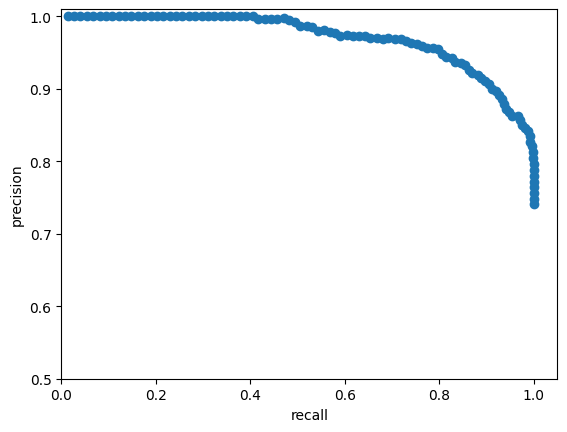

In [9]:
plt.scatter(recall, precision)
plt.xlim([0,1.05])
plt.ylim([0.50,1.01])
plt.xlabel("recall")
plt.ylabel("precision")

# Filtered without control questions

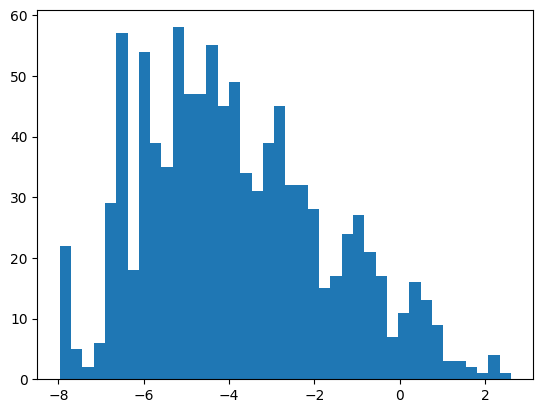

In [10]:
prob_random_q = denoise(sample_ans[:,:9], radixes[:9], question_types[:9])

plt.hist(prob_random_q, bins=40)
plt.show()

In [11]:
ground_truth = idx_truth

In [12]:
precision = []
recall = []

for p in np.arange(1,101,1):
    threshold_q = np.percentile(prob_random_q, p)
    test = prob_random_q < threshold_q
    
    # tp / tp+fp
    precision.append(np.logical_and(test, ground_truth).sum() / test.sum())
    # tp / tp+fn
    recall.append(np.logical_and(test, ground_truth).sum() / ground_truth.sum())

Text(0, 0.5, 'precisioin')

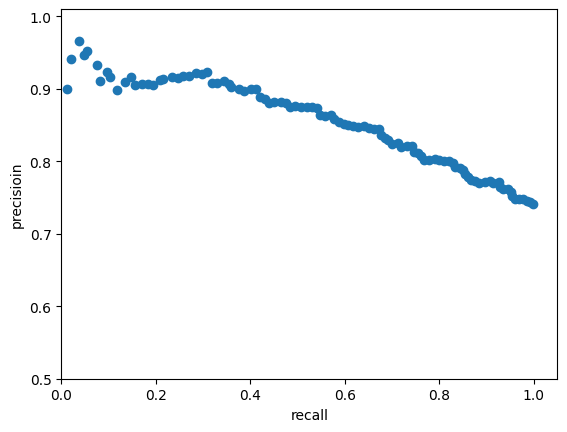

In [13]:
plt.scatter(recall, precision)
# plt.xlim([0,1])
# plt.ylim([0.6,1])
plt.xlim([0,1.05])
plt.ylim([0.50,1.01])
plt.xlabel("recall")
plt.ylabel("precisioin")

# Replication of results with error bars (using bootstrap)

Here, test is the selected responses that are identified as "less likely to be random". We are going to perform bootstrap on it to calcualate the standard error of the results and see whether the result replicates the PEW survey.

In [14]:
test = prob_random_all < np.percentile(prob_random_all, 60)

print(test.sum())
print("Precision: ", np.logical_and(test, ground_truth).sum() / test.sum())
print("Recall: ", np.logical_and(test, ground_truth).sum() / ground_truth.sum())

sample_filtered = sample_ans[test]

600
Precision:  0.9566666666666667
Recall:  0.7746288798920378


## Plot of raw data

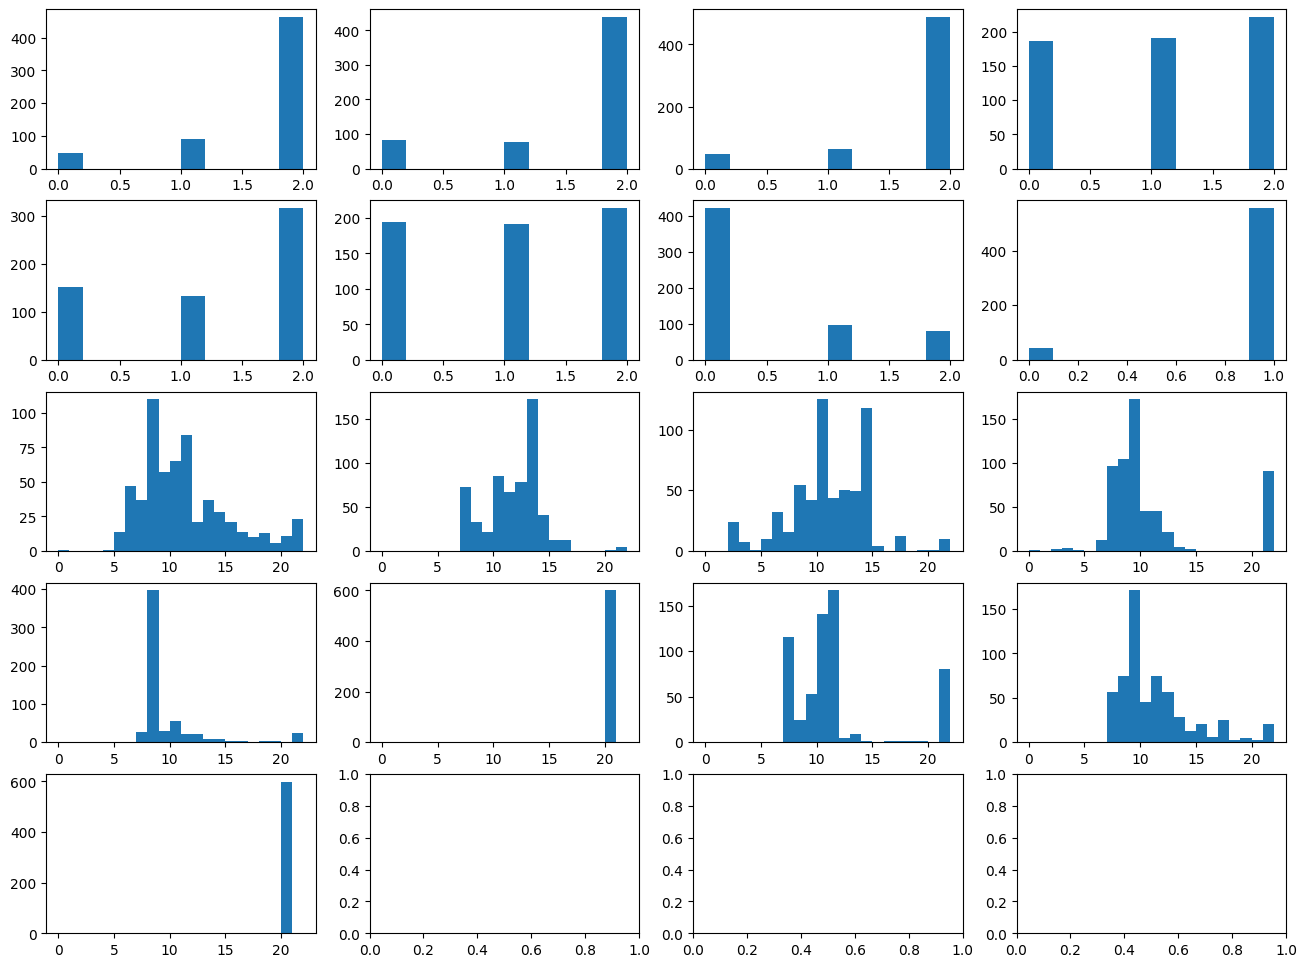

In [15]:
fig, axs = plt.subplots(5,4, figsize=(16,12))
for i in range(0,17):
    row = i // 4
    col = i % 4
    
    if question_types[i] == "estimate":
        axs[row][col].hist(sample_filtered[:,i], bins=np.arange(0,23))
    else:
        axs[row][col].hist(sample_filtered[:,i])

## Bootstrap

In [30]:
# remove the indicator questions, only the easier/same/harder ones
df_test = df_ans.iloc[test,:10]
df_test.reset_index(drop=True, inplace=True)

# number of filtered responses
MAX_SAMPLE_SIZE = test.sum()

In [31]:
df_test

,id,saving,tuition,home,spouse,job,college,comm,us,age
0,ARPBDM5QZ4XQC,Harder,Easier,Harder,Easier,Easier,Easier,Easier,Yes,44.0
1,A1YSYI926BBOHW,Harder,Harder,Harder,Easier,Same,Same,Harder,Yes,38.0
2,A1DMXEJGJY02E1,Harder,Harder,Harder,Same,Harder,Same,Easier,Yes,34.0
3,AAIQLE701DI9U,Harder,Harder,Harder,Same,Same,Harder,Easier,Yes,34.0
4,AU849EHZNGV2Z,Harder,Same,Harder,Easier,Easier,Easier,Easier,Yes,36.0
...,...,...,...,...,...,...,...,...,...,...
595,ABVYNKCG6HU4R,Harder,Harder,Harder,Harder,Same,Same,Same,Yes,25.0
596,AXFP50XOZD2NI,Same,Same,Harder,Same,Same,Same,Easier,Yes,36.0
597,A1BPU6PHYCXFRT,Harder,Same,Harder,Easier,Easier,Same,Same,Yes,32.0
598,A1KI6JFFI8HC2D,Harder,Same,Easier,Same,Harder,Easier,Easier,Yes,32.0


In [32]:
harder_counts_all = []
easier_counts_all = []
same_counts_all = []

sample_sizes= []

In [35]:
# bootstrap for 100 times
for i in range(0, 100):
    # initial sample size
    sample_size = 30

    choices = random.choices(range(0, MAX_SAMPLE_SIZE), k=sample_size)
    d = empirical_effect_size(df_test.loc[choices], question_types[:9], radixes[:9])
    print("d =", d)

    while d < 8:
        sample_size = int(sample_size * 1.5)
        choices = random.choices(range(0, MAX_SAMPLE_SIZE), k=sample_size)
        d = empirical_effect_size(df_test.loc[choices], question_types[:9], radixes[:9])
        print("\tNew sample size: ", sample_size, "\t d = ", d)

    sample_sizes.append(sample_size);
    df_sample = df_test.loc[choices]
    # labels = ["Saving for the future", "Paying for college", "Buying a home", "Finding a spouse or partner", "Finding a job", "Getting into college", "Staying in touch with family and friends"]
    labels = ["saving", "tuition", "home", "spouse", "job", "college", "comm"]

    harder_counts = []
    easier_counts = []
    same_counts = []

    for label in labels:
        c_label = df_sample[df_sample["us"] == "Yes"][label].value_counts(normalize=True)
        # display(c_label)
        harder_counts.append(c_label.get("Harder", default=0))
        easier_counts.append(c_label.get("Easier", default=0))
        same_counts.append(c_label.get("Same", default=0))

    harder_counts_all.append(harder_counts.copy())
    easier_counts_all.append(easier_counts.copy())
    same_counts_all.append(same_counts.copy())

d = 11.889555294989167
d = 9.647011086349028
d = 8.878819819703661
d = 9.536189705416417
d = 8.152108416404706
d = 10.347731111738605
d = 9.05016983874927
d = 9.687508698694256
d = 9.429259235994383
d = 10.984015509622573
d = 10.40052911378434
d = 9.770988545040298
d = 11.161889382792854
d = 10.008882092078391
d = 8.981992505217985
d = 8.750312908072615
d = 10.4014614522592
d = 10.997850940142794
d = 10.844921000348549
d = 10.515627920401757
d = 11.772459735575266
d = 9.84085193866178
d = 9.833442572478159
d = 9.590428674128626
d = 9.640316145523101
d = 9.294441747875673
d = 10.67315521544439
d = 10.268789282512294
d = 9.30360123505713
d = 10.661412627125626
d = 10.774681373287036
d = 9.819404657477582
d = 9.634206408785193
d = 10.195541712145982
d = 10.38386131159167
d = 9.49900563342883
d = 10.996409930372659
d = 12.065544505535753
d = 10.520765555305013
d = 11.536930230065805
d = 11.707881685708342
d = 11.168765000675775
d = 10.412796186788464
d = 9.128980998031222
d = 11.1932811366

/tmp/ipykernel_13132/1154877892.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


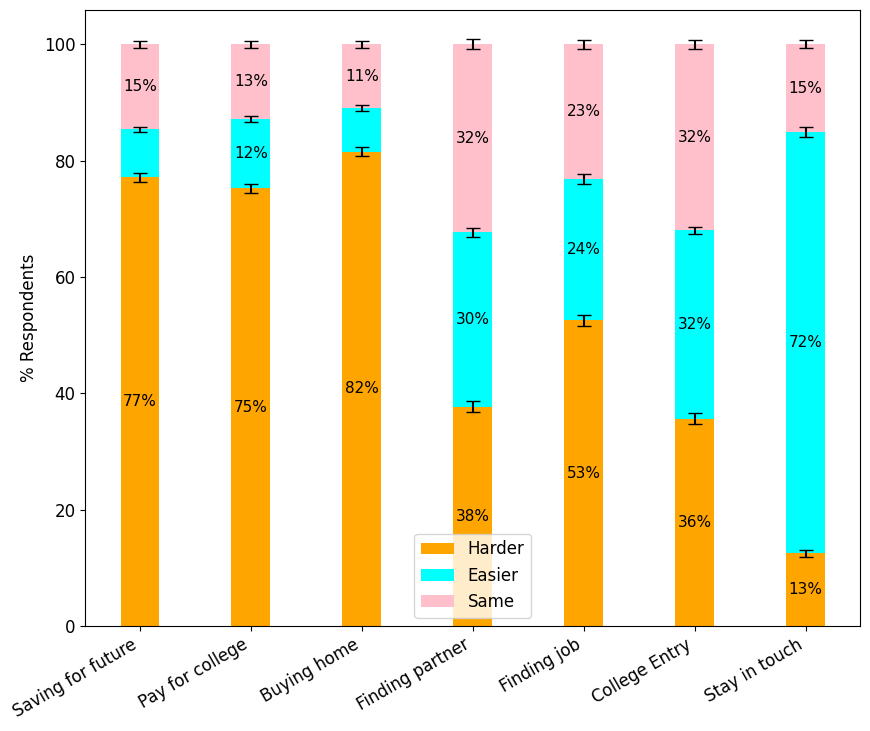

In [40]:
import matplotlib.style as style
style.use('seaborn-colorblind')

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

harder_counts_all_a = np.array(harder_counts_all) * 100
easier_counts_all_a = np.array(easier_counts_all) * 100
same_counts_all_a = np.array(same_counts_all) * 100

# the std below are actually standard error (stdev/sqrt(n)), where n=100 (number of bootstrap)

harder_means = harder_counts_all_a.mean(axis=0)
harder_std = harder_counts_all_a.std(axis=0)/10.

easier_means = easier_counts_all_a.mean(axis=0)
easier_std = easier_counts_all_a.std(axis=0)/10.

same_means = same_counts_all_a.mean(axis=0)
same_std = same_counts_all_a.std(axis=0)/10.

figlabels = ["Saving for future", "Pay for college", "Buying home", "Finding partner", "Finding job", "College Entry", "Stay in touch"]

width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(figlabels, harder_means, width, yerr=harder_std, label='Harder', color="orange", capsize=5)
ax.bar(figlabels, easier_means, width, bottom=harder_means, yerr=easier_std, label='Easier', color="cyan", capsize=5)
ax.bar(figlabels, same_means, width, bottom=[a+b for a,b in zip(harder_means, easier_means)], yerr=same_std, label='Same', color="pink", capsize=5)

for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}%'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 9:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=11)


plt.xticks(rotation=30, ha='right')
ax.legend(loc="lower center")
ax.set_ylabel('% Respondents')

# plt.show()
plt.savefig("res.png")